# Popular Data Science Questions

In this scenario, we're working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest. The goal is to find what is the best content to write about.

To do that we will explore the website Stack Exchange where people discuss several topic, upvote some posts and answers...

In Data Science Stack Exchange, each post is a question from a user, the questions have to be related to data science. It can be about data-mining, machine-learning or a programming language.

For each post there are votes, the number of views and answers, the post date, and tags to identify the subject of the question.

Stack Exchange provides a public data base for each of its websites. From this datavase we will take the table named "Posts" and more specifically the columns below:

    Id: An identification number for the post.

    PostTypeId: An identification number for the type of post.

    CreationDate: The date and time of creation of the post.

    Score: The post's score.

    ViewCount: How many times the post was viewed.

    Tags: What tags were used.

    AnswerCount: How many answers the question got (only applicable to question 
    posts).

    FavoriteCount: How many times the question was favored (only applicable to question posts).
    
We'll take only the posts of 2019.

In [1]:
%cd C:\Users\debie\Documents\anaconda_space

C:\Users\debie\Documents\anaconda_space


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
questions = pd.read_csv('2019_questions.csv')
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


In [5]:
questions['FavoriteCount'].value_counts()

1.0     953
2.0     205
0.0     175
3.0      43
4.0      12
5.0       8
7.0       4
6.0       4
11.0      1
16.0      1
8.0       1
Name: FavoriteCount, dtype: int64

There are 7 columns for 8839 rows. Only the column FavoriteCount got missing values. We can fill the missing values with 0.

The tags in the Tags columns are contained inside <>.

In [6]:
questions['FavoriteCount'].fillna(0.0, inplace = True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             8839 non-null   int64 
 1   CreationDate   8839 non-null   object
 2   Score          8839 non-null   int64 
 3   ViewCount      8839 non-null   int64 
 4   Tags           8839 non-null   object
 5   AnswerCount    8839 non-null   int64 
 6   FavoriteCount  8839 non-null   int32 
dtypes: int32(1), int64(4), object(2)
memory usage: 449.0+ KB


Let's clean the Tags column now.

In [7]:
questions['Tags'] = questions['Tags'].str.replace("><",",").str.replace("<","").str.replace(">","")
questions["Tags"].head()

0                         machine-learning,data-mining
1    machine-learning,regression,linear-regression,...
2              python,time-series,forecast,forecasting
3                    machine-learning,scikit-learn,pca
4                  dataset,bigdata,data,speech-to-text
Name: Tags, dtype: object

In [8]:
questions_ = questions.groupby("Tags")
questions_.tail()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1,44420,2019-01-23 09:34:01,0,25,"machine-learning,regression,linear-regression,...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"python,time-series,forecast,forecasting",0,0
3,44427,2019-01-23 10:57:09,0,55,"machine-learning,scikit-learn,pca",1,0
4,44428,2019-01-23 11:02:15,0,19,"dataset,bigdata,data,speech-to-text",0,0
5,44430,2019-01-23 11:13:32,0,283,fuzzy-logic,1,0
...,...,...,...,...,...,...,...
8834,55413,2019-07-10 09:08:31,1,39,"pca,dimensionality-reduction,linear-algebra",1,1
8835,55414,2019-07-10 09:34:55,0,113,"keras,weight-initialization",0,0
8836,55415,2019-07-10 09:45:37,1,212,"python,visualization,seaborn",1,0
8837,55416,2019-07-10 09:59:56,0,22,time-series,0,0


Below, we will count how many times each tags was used and viewed.

First we isolate in a new DataFrame the columns Tags and ViewCount.

In [9]:
tags_count = pd.DataFrame(questions["Tags"])
tags_count["tags"] = questions["Tags"].str.split(",")
tags_count["view_count"] = questions["ViewCount"]

Then we count the number of times each tag was used.

In [10]:
temp = tags_count["tags"].sum()
temp = pd.Series(temp)
tags_used = pd.DataFrame(temp.value_counts())
tags_used = tags_used.reset_index(level=0)
tags_used = tags_used.rename(columns = {0 : "n_used", "index" : "tags"})
tags_used.head(10)

,tags,n_used
0,machine-learning,2693
1,python,1814
2,deep-learning,1220
3,neural-network,1055
4,keras,935
5,classification,685
6,tensorflow,584
7,scikit-learn,540
8,nlp,493
9,cnn,489


Now we determine how many times each tags were seen.

In [11]:
tags_count["n_tags"] = tags_count["tags"].apply(lambda list: len(list))
tags_count = pd.DataFrame(tags_count)

def n_viewf(col_1, col_2):
    n_viewl = []
    for i in range(col_2):
        n_viewl.append(col_1)
    return n_viewl

n_tags = tags_count["n_tags"].to_list()
ViewCount = tags_count["view_count"].to_list()

list = []
for i in range(len(n_tags)):
    list.append(n_viewf(ViewCount[i], n_tags[i]))
flat_list = [x for xs in list for x in xs]

tags_view_temp = pd.DataFrame(tags_count["tags"].sum())
tags_view_temp["n_view"] = pd.Series(flat_list)
tags_view_temp = tags_view_temp.rename(columns = {0 : "tags"})
tags_view = tags_view_temp.groupby("tags").sum().sort_values("n_view", ascending = False) 
tags_view = tags_view.reset_index(level=0)
tags_view.head(10)

,tags,n_view
0,python,537585
1,machine-learning,388499
2,keras,268608
3,deep-learning,233628
4,pandas,201787
5,neural-network,185367
6,scikit-learn,128110
7,tensorflow,121369
8,classification,104457
9,dataframe,89352


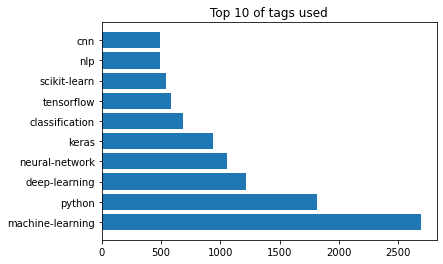

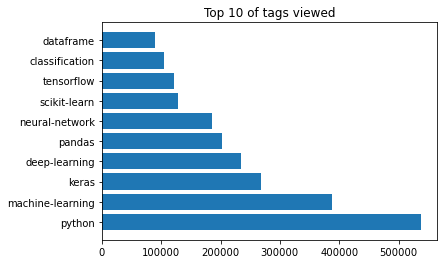

In [12]:
plt.barh(y = tags_used.head(10)["tags"], width = tags_used.head(10)["n_used"])
plt.title("Top 10 of tags used")
plt.show()

plt.barh(y = tags_view.head(10)["tags"], width = tags_view.head(10)["n_view"])
plt.title("Top 10 of tags viewed")
plt.show()

From the 2 graphics above we can extract 8 tags that are both in the top 10 most used and most viewed tags:

    - Python
    
    -Machine learning
    
    -Keras
    
    -Deep learning
    
    -Neural network
    
    -Scikit learn
    
    -Tensorflow
    
    -Classification

All the tags above are related to machine learning or deep learning.

# -------------------------------------------------------

We will now work with a new dataset which will hold all of the questions ever asked on DSSE, their dates and tags.



In this we will track the interest in deep learning across time. We will:

    Count how many deep learning questions are asked per time period.
    The total amount of questions per time period.
    How many deep learning questions there are relative to the total amount of questions per time period.


In [13]:
all_questions = pd.read_csv('all_questions.csv')
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [14]:
all_questions['Tags'] = all_questions['Tags'].str.replace("><",",").str.replace("<","").str.replace(">","")
all_questions["Tags"] = all_questions["Tags"].str.split(",")
all_questions.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


We can consider that a question is about deep-learning when the following tags are present: deep-learning / neural-network / keras / tensorflow

In [15]:
all_questions = all_questions.sort_values("CreationDate")

In [16]:
print(all_questions["CreationDate"].head(1))
print(all_questions["CreationDate"].tail(1))

65    2014-05-13 23:58:30
Name: CreationDate, dtype: object
21324    2020-01-19 03:01:03
Name: CreationDate, dtype: object


Now that we have sorted the dataframe by the date of the questions, we can see that it goes from May 13th 2014 to January 19th 2020.

We will simplify the CreationDate column by only considering the month and the year, and then count how many deep-learning related question there was for each month.

In [53]:
a = all_questions.copy()
all_questions["year"] = pd.PeriodIndex(all_questions["CreationDate"], freq='Y')

def dp_in(list):
    dp_tags = ["deep-learning", "neural-network", "keras", "tensorflow"]
    for i in list:
        for j in dp_tags:
            if i == j:
                return 1
    return 0

all_questions["deep"] = all_questions["Tags"].apply(dp_in)
all_questions["total"] = all_questions["Id"].apply(lambda x: 1)

In [63]:
dp_questions = all_questions.groupby("year").sum()
dp_questions.drop("Id", axis = 1, inplace = True)
dp_questions = dp_questions.reset_index(level=0)
dp_questions["year"] = dp_questions["year"].astype(int) + 1970
dp_questions["deep_prct"] = (dp_questions["deep"] / dp_questions["total"]) * 100
dp_questions.head(10)

C:\Users\debie\AppData\Local\Temp/ipykernel_6672/3913677924.py:4: FutureWarning: casting period[A-DEC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  dp_questions["year"] = dp_questions["year"].astype(int) + 1970


,year,deep,total,deep_prct
0,2014,30,562,5.338078
1,2015,114,1167,9.768638
2,2016,417,2146,19.431500
3,2017,883,2957,29.861346
4,2018,1876,5475,34.264840
5,2019,2695,8810,30.590238
6,2020,130,459,28.322440


Text(0, 1.15, 'Percentage of deep learning related topics in DSSE')

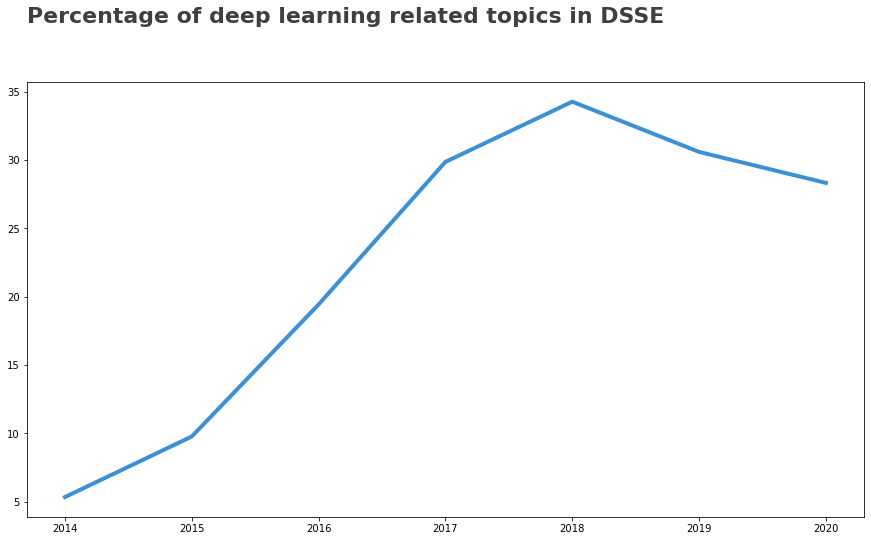

In [65]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(
    dp_questions["year"],
    dp_questions["deep_prct"],
    color="#0B74CB",
    linewidth=4,
    alpha=.8
)
ax.text(
    0, 1.15, "Percentage of deep learning related topics in DSSE",
    horizontalalignment="left",
    verticalalignment="center",
    transform=ax.transAxes,
    size=22, weight="bold",
    alpha=.75
)

We can see that between 2014 and 2018 the number of deep-learning increased from 5 % to 35 %. There is a slight decrease starting in the beginning of 2018 until 2020 which is the last date of the dataset.

We can't really say if this decreasing trend will keep going, but from what is shown in the graph, deep-learning is a topic of interest for a large amount of people.